In [1]:
import random
import numpy as np
import sectionproperties.pre.sections as sections
from sectionproperties.analysis.cross_section import CrossSection
import time

start_time = time.time()

In [2]:
def pickOne(array):
    index = 0
    r = random.uniform(0,1)
    while(r>0):
        r -= array[index].fitness
        index += 1
    index -= 1
    return array[index]

In [3]:
class Population:
    def __init__(self,size):
        self.size = size
        self.individuals = []
        self.maxFitness = 0
        
        for _ in range(self.size):
            self.individuals.append(Individual())

    def selection(self):
        self.maxFitness = 0
        self.totalFitness = 0
               
        #fitness scores
        for i in range(self.size):
            ind = self.individuals[i]
            ind.calcFitness()
            self.totalFitness += ind.fitness
            if ind.fitness > self.maxFitness:
                self.maxFitness = ind.fitness

        #best of current generation
        self.best = sorted(self.individuals, key=lambda indiv: indiv.fitness, reverse=True)[0].DNA.genes
        bests.append(sorted(self.individuals, key=lambda ind: ind.fitness, reverse=True)[0])
                
        #normalize fitness and add to mating pool
        for ind in self.individuals:
            ind.fitness /= self.totalFitness
            #print(ind.fitness)
##            for _ in range(int(ind.fitness * 100)):
##                self.matingPool.append(ind)
                

    def crossover(self):
        offspring = []
        for _ in range(self.size):
            parent1 = np.array(pickOne(self.individuals).DNA.genes)
            parent2 = np.array(pickOne(self.individuals).DNA.genes)
            
            split = random.randint(0,parent1.size)
            c_genes = np.append(parent1[:split],parent2[split:])
            
            child = Individual(genes=c_genes)
            child.calcFitness()
            offspring.append(child)

        self.individuals = offspring
        
    def mutate(self):
        pass
        #print('mutation')
        

In [4]:
class DNA:
    def __init__(self,genes):
        if len(genes) == 0:
            self.genes = []
            self.t_f = random.uniform(0,100)
            self.t_w = random.uniform(0,100)
            self.r = random.uniform(0,100)
            self.genes = [self.t_f,self.t_w,self.r]
        else:
            self.genes = genes

In [5]:
class Individual:
    def __init__(self,genes=[]):
        self.DNA = DNA(genes)
        self.fitness = 0

        self.geometry = sections.ISection(d=203, b=133, t_f=self.DNA.genes[0], t_w=self.DNA.genes[1], r=self.DNA.genes[2], n_r=16)
        self.mesh = self.geometry.create_mesh(mesh_sizes=[5])
        self.section = CrossSection(self.geometry,self.mesh)

        self.section.calculate_geometric_properties(time_info=False)
        #self.section.calculate_warping_properties(time_info=False)

    def calcFitness(self):
        self.fitness = self.section.get_ic()[0]

In [6]:
n_generations = 5

population = Population(10)
bests = []

In [7]:
for i in range(1,n_generations+1):
    population.selection()
    population.crossover()
    population.mutate()
    print('Generation '+ str(i)+' | Max Fitness: '+ str(population.maxFitness)+' | '+ 'Best Section: '+str(population.best))

Generation 1 | Max Fitness: 106111130.76919532 | Best Section: [20.2158324758971, 93.38984168040881, 88.79556291952521]
Generation 2 | Max Fitness: 106111130.76919532 | Best Section: [20.21583248 93.38984168 88.79556292]
Generation 3 | Max Fitness: 106111130.76919532 | Best Section: [20.21583248 93.38984168 88.79556292]
Generation 4 | Max Fitness: 106474102.61009836 | Best Section: [14.32099416 90.01939707 88.79556292]
Generation 5 | Max Fitness: 103897607.66612652 | Best Section: [ 4.10720519 81.63474284 88.79556292]


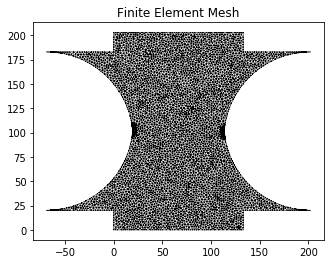

Section Properties:
A	 = 2.736722e+04
Qx	 = 2.777773e+06
Qy	 = 1.819920e+06
cx	 = 6.650000e+01
cy	 = 1.015000e+02
Ixx_g	 = 3.880551e+08
Iyy_g	 = 1.721222e+08
Ixy_g	 = 1.847219e+08
Ixx_c	 = 1.061111e+08
Iyy_c	 = 5.109750e+07
Ixy_c	 = 2.384186e-07
Zxx+	 = 1.045430e+06
Zxx-	 = 1.045430e+06
Zyy+	 = 3.771298e+05
Zyy-	 = 3.771298e+05
rx	 = 6.226803e+01
ry	 = 4.321002e+01
phi	 = 0.000000e+00
I11_c	 = 1.061111e+08
I22_c	 = 5.109750e+07
Z11+	 = 1.045430e+06
Z11-	 = 1.045430e+06
Z22+	 = 3.771298e+05
Z22-	 = 3.771298e+05
r11	 = 6.226803e+01
r22	 = 4.321002e+01



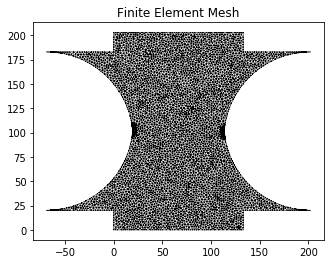

Section Properties:
A	 = 2.736722e+04
Qx	 = 2.777773e+06
Qy	 = 1.819920e+06
cx	 = 6.650000e+01
cy	 = 1.015000e+02
Ixx_g	 = 3.880551e+08
Iyy_g	 = 1.721222e+08
Ixy_g	 = 1.847219e+08
Ixx_c	 = 1.061111e+08
Iyy_c	 = 5.109750e+07
Ixy_c	 = 2.384186e-07
Zxx+	 = 1.045430e+06
Zxx-	 = 1.045430e+06
Zyy+	 = 3.771298e+05
Zyy-	 = 3.771298e+05
rx	 = 6.226803e+01
ry	 = 4.321002e+01
phi	 = 0.000000e+00
I11_c	 = 1.061111e+08
I22_c	 = 5.109750e+07
Z11+	 = 1.045430e+06
Z11-	 = 1.045430e+06
Z22+	 = 3.771298e+05
Z22-	 = 3.771298e+05
r11	 = 6.226803e+01
r22	 = 4.321002e+01



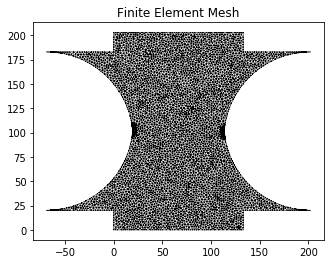

Section Properties:
A	 = 2.736722e+04
Qx	 = 2.777773e+06
Qy	 = 1.819920e+06
cx	 = 6.650000e+01
cy	 = 1.015000e+02
Ixx_g	 = 3.880551e+08
Iyy_g	 = 1.721222e+08
Ixy_g	 = 1.847219e+08
Ixx_c	 = 1.061111e+08
Iyy_c	 = 5.109750e+07
Ixy_c	 = 2.384186e-07
Zxx+	 = 1.045430e+06
Zxx-	 = 1.045430e+06
Zyy+	 = 3.771298e+05
Zyy-	 = 3.771298e+05
rx	 = 6.226803e+01
ry	 = 4.321002e+01
phi	 = 0.000000e+00
I11_c	 = 1.061111e+08
I22_c	 = 5.109750e+07
Z11+	 = 1.045430e+06
Z11-	 = 1.045430e+06
Z22+	 = 3.771298e+05
Z22-	 = 3.771298e+05
r11	 = 6.226803e+01
r22	 = 4.321002e+01



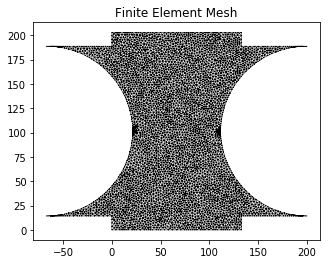

Section Properties:
A	 = 2.631820e+04
Qx	 = 2.671298e+06
Qy	 = 1.750161e+06
cx	 = 6.650000e+01
cy	 = 1.015000e+02
Ixx_g	 = 3.776108e+08
Iyy_g	 = 1.632384e+08
Ixy_g	 = 1.776413e+08
Ixx_c	 = 1.064741e+08
Iyy_c	 = 4.685273e+07
Ixy_c	 = -3.278255e-07
Zxx+	 = 1.049006e+06
Zxx-	 = 1.049006e+06
Zyy+	 = 3.501561e+05
Zyy-	 = 3.501561e+05
rx	 = 6.360538e+01
ry	 = 4.219290e+01
phi	 = 0.000000e+00
I11_c	 = 1.064741e+08
I22_c	 = 4.685273e+07
Z11+	 = 1.049006e+06
Z11-	 = 1.049006e+06
Z22+	 = 3.501561e+05
Z22-	 = 3.501561e+05
r11	 = 6.360538e+01
r22	 = 4.219290e+01



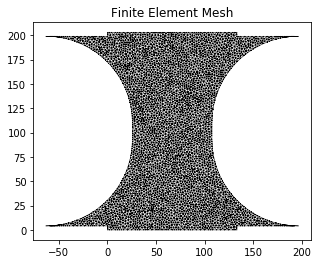

Section Properties:
A	 = 2.380728e+04
Qx	 = 2.416439e+06
Qy	 = 1.583184e+06
cx	 = 6.650000e+01
cy	 = 1.015000e+02
Ixx_g	 = 3.491662e+08
Iyy_g	 = 1.427724e+08
Ixy_g	 = 1.606932e+08
Ixx_c	 = 1.038976e+08
Iyy_c	 = 3.749070e+07
Ixy_c	 = 3.576279e-07
Zxx+	 = 1.023622e+06
Zxx-	 = 1.023622e+06
Zyy+	 = 2.892512e+05
Zyy-	 = 2.892512e+05
rx	 = 6.606142e+01
ry	 = 3.968322e+01
phi	 = 0.000000e+00
I11_c	 = 1.038976e+08
I22_c	 = 3.749070e+07
Z11+	 = 1.023622e+06
Z11-	 = 1.023622e+06
Z22+	 = 2.892512e+05
Z22-	 = 2.892512e+05
r11	 = 6.606142e+01
r22	 = 3.968322e+01

Time Elapsed: 00:18:39


In [8]:
for best in bests:
    best.section.plot_mesh()
    best.section.display_results(fmt='8.6e')
    #stress_post = best.section.calculate_stress(N=0, Vx=0, Vy=0, Mxx=100, Myy=0, M11=0, M22=0, Mzz=0)
    #stress_post.plot_stress_mxx_zz()
    
elapsed_time = time.time() - start_time 
print('Time Elapsed: '+ time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))